### api

#### 安装torch
1. 检查cuda版本: NVIDIA-smi
2. 使用uv pip安装: `uv pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126`

In [3]:
import numpy as np
import torch

#### matrix multiplication

In [ ]:
def matmul(a, b):
    return np.dot(a, b)

# 使用torch
a = torch.randn(3, 4)
b = torch.randn(4, 2)
c = a @ b

#### matrix addition

In [10]:
def matadd(a, b):
    return a + b

# 使用torch
a = torch.randn(3, 4)
b = torch.randn(3, 4)
c = a + b

#### matrix transpose

In [16]:
def transpose(a):
    return a.T

# useage
transpose(np.array([[1, 2], [3, 4]]))

# 或者使用torch
a = torch.randn(3, 4)
a_t = a.t()           # 转置为 4x3
# 或交互两个维度
a = torch.randn(2, 3, 4)
a_t = torch.transpose(a, 1, 2)  # 交换第1和第2维度, 输出为 2x4x3, 第一个维度可以看作是batch_size, 没有变

# 使用permute, permute可以一次性交换多个维度
a = torch.randn(2, 3, 4)
a_t = a.permute(0, 2, 1)  # 交换第1和第2维度, 输出为 2x4x3, 第一个维度可以看作是batch_size, 没有变
torch.equal(a_t, torch.transpose(a, 1, 2))

True

#### matrix reshape

In [ ]:
a = torch.randn(6, 2)
b = a.reshape(3, 4)     # 重塑为 3x4
# 或使用 view (需连续)
b = a.view(3, 4)

tensor([[-1.6998,  2.8771],
        [ 0.0795,  0.6788],
        [-0.7718,  0.3488],
        [-0.3760, -0.0326],
        [ 0.7805,  0.6741],
        [-0.8474, -0.5179]])
tensor([[-1.6998,  2.8771,  0.0795,  0.6788],
        [-0.7718,  0.3488, -0.3760, -0.0326],
        [ 0.7805,  0.6741, -0.8474, -0.5179]])
tensor([[-1.6998,  2.8771,  0.0795,  0.6788],
        [-0.7718,  0.3488, -0.3760, -0.0326],
        [ 0.7805,  0.6741, -0.8474, -0.5179]])


#### matrix initialization

In [23]:
def init_matrix(shape):
    return np.random.randn(*shape)

# useage
init_matrix((2, 2))


# 使用torch
zeros = torch.zeros(3, 4)       # 全零矩阵
ones = torch.ones(3, 4)         # 全一矩阵
rand_matrix = torch.rand(3, 4)  # 均匀分布 [0,1)
randn_matrix = torch.randn(3, 4)# 标准正态分布

#### calc sin and cos

#### word tokenization(tiktoken)

#### get random index in words

#### apply matrix mask

tensor([[0.0295, 0.0232, 0.3002, 0.8024],
        [0.2304, 0.1636, 0.2686, 0.9393],
        [0.5409, 0.3600, 0.6509, 0.9590]])


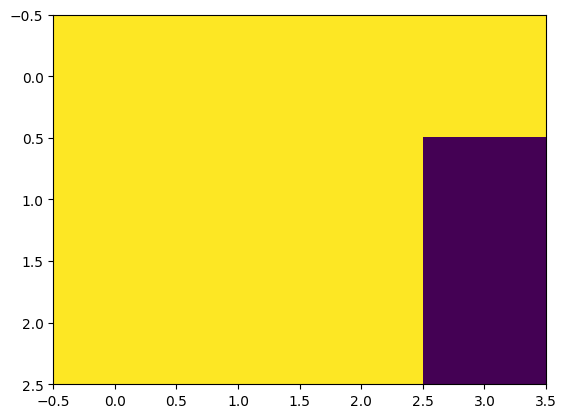

In [115]:
a = torch.rand(3, 4)
print(a)

mask = (a > 0.9)          # 生成布尔掩码
masked_b = a.masked_fill(mask, -1e9)  # 将正值替换为 -1e9

# 可视化
import matplotlib.pyplot as plt
plt.imshow(masked_b.numpy())
plt.show()

In [ ]:
# 如果和矩阵的一部分mask为具体的值
a = torch.rand(3, 4)
print(a)

# 生成一个上三角矩阵. diagonal为0, 代表包含对角线
mask = torch.triu(torch.ones_like(a, dtype=torch.bool), diagonal=1)
# mask = torch.triu(torch.ones(a.shape[0], a.shape[1], dtype=torch.bool), diagonal=1)
print(mask)

# a矩阵中mask为True的部分替换为-1e9
masked_a = a.masked_fill(mask, value=-1e9)
print(masked_a)

tensor([[0.8358, 0.9703, 0.6392, 0.5983],
        [0.1386, 0.0528, 0.2840, 0.1380],
        [0.2713, 0.8566, 0.2319, 0.9742]])
tensor([[False,  True,  True,  True],
        [False, False,  True,  True],
        [False, False, False,  True]])
tensor([[ 8.3585e-01, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [ 1.3857e-01,  5.2847e-02, -1.0000e+09, -1.0000e+09],
        [ 2.7128e-01,  8.5660e-01,  2.3192e-01, -1.0000e+09]])


#### create feed forward network

#### calc softmax

In [ ]:
logits = torch.randn(3, 4)
print(logits)
softmax = torch.nn.functional.softmax(logits, dim=-1)  # 沿最后一维计算(每一行)
print(softmax)
sum(softmax[0])

tensor([[-0.1718, -0.5286, -1.6809, -0.0682],
        [ 1.5836,  1.3306, -0.6364, -1.8612],
        [-1.3509, -0.4497, -0.7977, -1.0104]])
tensor([[0.3300, 0.2310, 0.0730, 0.3660],
        [0.5217, 0.4050, 0.0567, 0.0166],
        [0.1514, 0.3727, 0.2632, 0.2128]])


tensor(1.)

#### calc sqrt root

#### apply layer normalization

#### calc max value in logits

#### create feed forward network

#### calc cross entropy

### 其他

关于torch中contiguous的意思: https://stackoverflow.com/a/69599806/12855525
1. 其实就是tensor中的数据是不是连续存储的，有没有出现跳跃的情况
2. 如果tensor不是连续存储的，可以使用contiguous()方法来使其连续存储